Objectif : section efficace d'interaction CEvNS (neutrinos solaires)

    a. Constantes



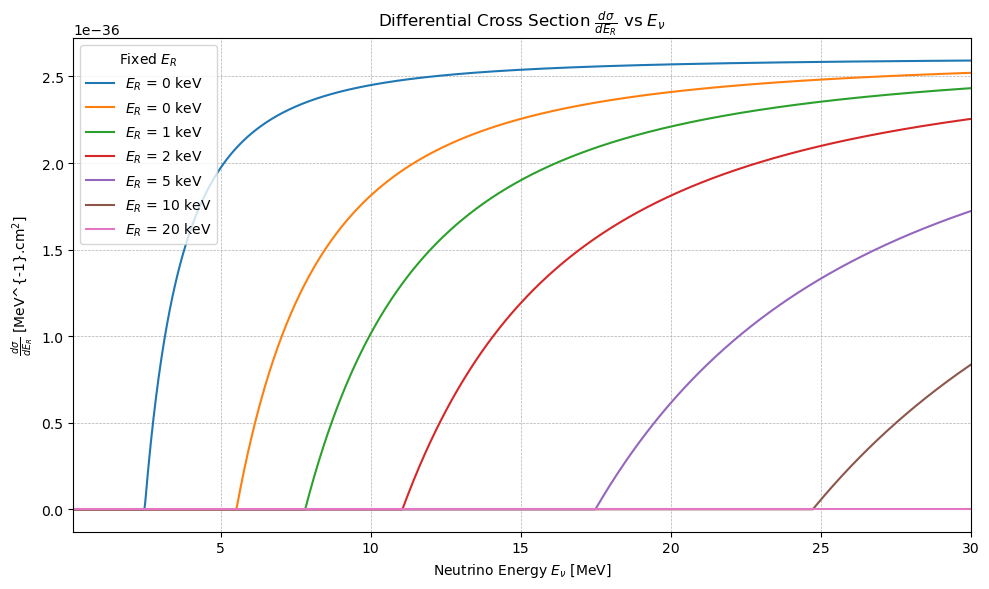

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# physical constants for xenon 
N = 77
Z = 54
G_F = 1.1664e-11 # MeV^-2 Fermi's constant
m_A = 131.293 * 931.5  # MeV
Q_V = N - 0.1084 * Z
conv = 197.327e-13   # conversion MeV^-1 en cm (from hbar*c = 1)
G_F = conv * 1.1664e-11 # MeV^-2 Fermi's constant in units of hbar*c

# Domain of Ev : from 0.1 to 30 MeV
E_v = np.linspace(0.1, 30, 1000)

# Different values of E_R ( MeV)
ER_fixed_values = [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02]  #Useful to plot different cross section

#We prepare a single figure to plot every cross section in
plt.figure(figsize=(10, 6))

# Boucle sur chaque ER
for ER_fixed in ER_fixed_values:
    dsigma = []
    for Ev in E_v:
        ER_max = (2 * Ev**2) / (m_A + 2 * Ev) #Formula given in references
        if ER_fixed > ER_max:
            dsigma.append(0) #There is no CEvNS past ER_max so no cross-section
        else:
            val = (G_F**2 * m_A) / (4 * np.pi) * Q_V**2 * (1 - ((m_A * ER_fixed) / (2 * Ev**2)))
            dsigma.append(val)
    dsigma = np.array(dsigma) #convert into an np.array to easy plotting
    #Let's plot for every ER_fixed 
    plt.plot(E_v, dsigma, label=f"$E_R$ = {ER_fixed*1000:.0f} keV")

# Affichage
plt.title(r"Differential Cross Section $\frac{d\sigma}{dE_R}$ vs $E_\nu$")
plt.xlabel("Neutrino Energy $E_\\nu$ [MeV]")
plt.ylabel(r"$\frac{d\sigma}{dE_R}$ [MeV^{-1}.cm$^2$]")
plt.xlim(0.1, 30)
plt.legend(title="Fixed $E_R$")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Now let's calculate the total cross section over E_R

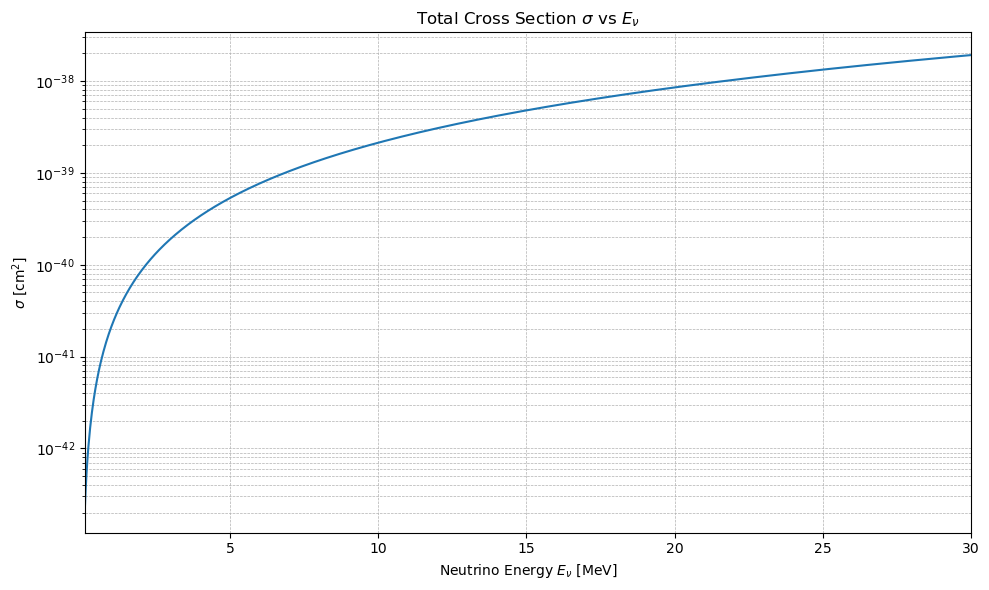

In [ ]:
from scipy.integrate import trapezoid

sigma = []

for Ev in E_v :
    dsigma = []
    ER_max = (2 * Ev**2) / (m_A + 2 * Ev)
    ER = np.linspace(0,ER_max,500)
    for Er in ER :
        if Er > ER_max : 
            dsigma.append(0)
        else : 
            val = (G_F**2 * m_A) / (4 * np.pi) * Q_V**2 * (1 - (m_A * Er) / (2 * Ev**2))
            dsigma.append(val)
    sigma.append(trapezoid(dsigma,ER))

# Affichage
plt.figure(figsize=(10, 6))
plt.plot(E_v,sigma)
plt.title(r"Total Cross Section ${\sigma}$ vs $E_\nu$")
plt.xlabel("Neutrino Energy $E_\\nu$ [MeV]")
plt.ylabel(r"${\sigma}$ [cm$^2$]")
plt.xlim(0.1, 30)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()